# Objective: Create a baseline model
# To-do: Predict the item sales of every item in November 2015

# Import

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

item_cat = pd.read_csv("/Users/leo/samurai/kaggle/pfs/data/item_categories.csv")
items = pd.read_csv("/Users/leo/samurai/kaggle/pfs/data/items.csv")
train = pd.read_csv("/Users/leo/samurai/kaggle/pfs/data/sales_train.csv")
shops = pd.read_csv("/Users/leo/samurai/kaggle/pfs/data/shops.csv")
test = pd.read_csv("/Users/leo/samurai/kaggle/pfs/data/test.csv")
sample_sub = pd.read_csv("/Users/leo/samurai/kaggle/pfs/data/sample_submission.csv")

# Check goal

In [34]:
sample_sub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


# EDA

## item_cat

In [35]:
item_cat.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [36]:
item_cat.shape

(84, 2)

In [37]:
item_cat.dtypes

item_category_name    object
item_category_id       int64
dtype: object

In [38]:
item_cat.isna().sum()

item_category_name    0
item_category_id      0
dtype: int64

In [39]:
item_cat.item_category_name.nunique()

84

In [40]:
item_cat.item_category_name.unique()[:5].tolist()

['PC - Гарнитуры/Наушники',
 'Аксессуары - PS2',
 'Аксессуары - PS3',
 'Аксессуары - PS4',
 'Аксессуары - PSP']

In [41]:
item_cat.item_category_name.value_counts()

Игровые консоли - PSP                  1
Игры - PS4                             1
Программы - MAC (Цифра)                1
Музыка - CD локального производства    1
Карты оплаты - Windows (Цифра)         1
                                      ..
Кино - Blu-Ray 3D                      1
Служебные                              1
Музыка - Подарочные издания            1
Кино - DVD                             1
Книги - Цифра                          1
Name: item_category_name, Length: 84, dtype: int64

In [42]:
item_cat["big_category"] = [
    x.split("-")[0].strip() for x in item_cat.item_category_name
]

In [43]:
item_cat.head()

,item_category_name,item_category_id,big_category
0,PC - Гарнитуры/Наушники,0,PC
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары


In [44]:
item_cat.big_category.nunique()

20

In [49]:
item_cat.big_category.value_counts()

Книги                                13
Подарки                              12
Игры                                  8
Игровые консоли                       8
Аксессуары                            7
Программы                             6
Музыка                                6
Кино                                  5
Карты оплаты                          4
Игры PC                               4
Служебные                             2
Доставка товара                       1
Карты оплаты (Кино, Музыка, Игры)     1
Чистые носители (шпиль)               1
Элементы питания                      1
Игры Android                          1
Игры MAC                              1
Билеты (Цифра)                        1
PC                                    1
Чистые носители (штучные)             1
Name: big_category, dtype: int64

In [61]:
rus_eng = {
    "Книги": "books",
    "Подарки": "present",
    "Игры": "games",
    "Игровые консоли": "game consoles",
    "Аксессуары": "accesories",
    "Программы": "programs",
    "Музыка": "music",
    "Кино": "cinema",
    "Карты оплаты": "gift_cards",
    "Игры PC": "pc_games",
    "Служебные": "services",
    "Доставка товара": "delivery",
    "Карты оплаты (Кино, Музыка, Игры)": "payment_cards",
    "Чистые носители (шпиль)": "cd",
    "Элементы питания": "battery",
    "Игры Android": "android_games",
    "Игры MAC": "mac_games",
    "Билеты (Цифра)": "tickets",
    "PC": "pc",
    "Чистые носители (штучные)": "dvd",
}

In [64]:
item_cat.big_category.replace(to_replace=rus_eng, inplace=True)

In [70]:
item_cat.big_category.value_counts()

books            13
present          12
game consoles     8
games             8
accesories        7
music             6
programs          6
cinema            5
pc_games          4
gift_cards        4
services          2
battery           1
dvd               1
cd                1
pc                1
mac_games         1
android_games     1
delivery          1
tickets           1
payment_cards     1
Name: big_category, dtype: int64

In [71]:
item_cat

,item_category_name,item_category_id,big_category
0,PC - Гарнитуры/Наушники,0,pc
1,Аксессуары - PS2,1,accesories
2,Аксессуары - PS3,2,accesories
3,Аксессуары - PS4,3,accesories
4,Аксессуары - PSP,4,accesories
...,...,...,...
79,Служебные,79,services
80,Служебные - Билеты,80,services
81,Чистые носители (шпиль),81,cd
82,Чистые носители (штучные),82,dvd


## items

In [72]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [74]:
items.shape

(22170, 3)

In [76]:
items.nunique()

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

In [89]:
full_items = pd.merge(
    items.drop(columns="item_name"),
    item_cat.drop(columns="item_category_name"),
    on="item_category_id",
)

In [90]:
full_items.head()

,item_id,item_category_id,big_category
0,0,40,cinema
1,2,40,cinema
2,3,40,cinema
3,4,40,cinema
4,5,40,cinema


## shops

In [124]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [125]:
shops.shape

(60, 2)

In [126]:
shops.nunique()

shop_name    60
shop_id      60
dtype: int64

In [129]:
shops.shop_name.value_counts()

Якутск Орджоникидзе, 56                            1
Интернет-магазин ЧС                                1
Адыгея ТЦ "Мега"                                   1
Уфа ТЦ "Семья" 2                                   1
Волжский ТЦ "Волга Молл"                           1
Жуковский ул. Чкалова 39м²                         1
Москва ТЦ "МЕГА Белая Дача II"                     1
Москва ТЦ "МЕГА Теплый Стан" II                    1
Москва МТРЦ "Афи Молл"                             1
СПб ТК "Сенная"                                    1
Воронеж (Плехановская, 13)                         1
СПб ТК "Невский Центр"                             1
Москва ТК "Буденовский" (пав.К7)                   1
РостовНаДону ТРК "Мегацентр Горизонт" Островной    1
Н.Новгород ТРЦ "РИО"                               1
Москва ТЦ "Перловский"                             1
Тюмень ТЦ "Зеленый Берег"                          1
Выездная Торговля                                  1
Жуковский ул. Чкалова 39м?                    

In [131]:
city = [x.split(" ")[0] for x in shops.shop_name]

In [133]:
shops['city'] = city

In [137]:
shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [139]:
shops.city.value_counts()

Москва              13
РостовНаДону         3
Воронеж              3
Тюмень               3
Уфа                  2
Самара               2
Новосибирск          2
Н.Новгород           2
!Якутск              2
СПб                  2
Красноярск           2
Жуковский            2
Якутск               2
Казань               2
Выездная             1
Балашиха             1
Мытищи               1
Курск                1
Вологда              1
Цифровой             1
Сургут               1
Ярославль            1
Волжский             1
Чехов                1
Калуга               1
Омск                 1
Сергиев              1
Химки                1
Коломна              1
Томск                1
Адыгея               1
Интернет-магазин     1
Name: city, dtype: int64

In [142]:
shops.loc[shops['city']=="!Якутск",'city'] = "Якутск"  

In [143]:
shops.city.value_counts()

Москва              13
Якутск               4
РостовНаДону         3
Воронеж              3
Тюмень               3
Уфа                  2
Самара               2
Новосибирск          2
Н.Новгород           2
СПб                  2
Красноярск           2
Жуковский            2
Казань               2
Выездная             1
Балашиха             1
Мытищи               1
Курск                1
Вологда              1
Цифровой             1
Сургут               1
Ярославль            1
Волжский             1
Адыгея               1
Интернет-магазин     1
Омск                 1
Сергиев              1
Химки                1
Калуга               1
Коломна              1
Томск                1
Чехов                1
Name: city, dtype: int64

## train

In [78]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [80]:
train.shape

(2935849, 6)

In [92]:
full_train = pd.merge(train, full_items)

In [93]:
full_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,big_category
0,02.01.2013,0,59,22154,999.0,1.0,37,cinema
1,23.01.2013,0,24,22154,999.0,1.0,37,cinema
2,20.01.2013,0,27,22154,999.0,1.0,37,cinema
3,02.01.2013,0,25,22154,999.0,1.0,37,cinema
4,03.01.2013,0,25,22154,999.0,1.0,37,cinema


In [103]:
month = train[["item_cnt_day", "item_id", "shop_id", "date_block_num"]].groupby(
    ["date_block_num", "shop_id", "item_id"]
).sum().rename(columns={"item_cnt_day":"item_cnt_month"})

In [105]:
month

item_cnt_month
date_block_num shop_id item_id                
0              0       32                  6.0
                       33                  3.0
                       35                  1.0
                       43                  1.0
                       51                  2.0
...                                        ...
33             59      22087               6.0
                       22088               2.0
                       22091               1.0
                       22100               1.0
                       22102               1.0

[1609124 rows x 1 columns]

In [110]:
full_train = pd.merge(full_train,month,on=["item_id",'date_block_num','shop_id'],how='left')

In [111]:
full_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,big_category,item_cnt_month
0,02.01.2013,0,59,22154,999.0,1.0,37,cinema,1.0
1,23.01.2013,0,24,22154,999.0,1.0,37,cinema,1.0
2,20.01.2013,0,27,22154,999.0,1.0,37,cinema,1.0
3,02.01.2013,0,25,22154,999.0,1.0,37,cinema,5.0
4,03.01.2013,0,25,22154,999.0,1.0,37,cinema,5.0
...,...,...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,40,cinema,1.0
2935845,01.10.2015,33,25,7903,12198.0,1.0,15,game consoles,1.0
2935846,29.10.2015,33,25,7610,2890.0,1.0,64,present,1.0
2935847,22.10.2015,33,25,7635,2100.0,1.0,64,present,1.0


In [144]:
full_train = pd.merge(full_train,shops.drop(columns='shop_name'))

In [145]:
full_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,big_category,item_cnt_month,city
0,02.01.2013,0,59,22154,999.0,1.0,37,cinema,1.0,Ярославль
1,16.05.2013,4,59,2573,249.0,1.0,55,music,1.0,Ярославль
2,26.01.2013,0,59,2574,399.0,1.0,55,music,2.0,Ярославль
3,09.01.2013,0,59,2574,399.0,1.0,55,music,2.0,Ярославль
4,24.02.2013,1,59,2574,399.0,1.0,55,music,1.0,Ярославль
...,...,...,...,...,...,...,...,...,...,...
2935844,28.10.2015,33,55,1819,1499.0,3.0,31,pc_games,4.0,Цифровой
2935845,29.10.2015,33,55,1819,1499.0,1.0,31,pc_games,4.0,Цифровой
2935846,24.10.2015,33,55,2390,99.0,1.0,31,pc_games,1.0,Цифровой
2935847,01.10.2015,33,55,1935,249.0,1.0,31,pc_games,1.0,Цифровой


Text(0.5, 1.0, 'Monthly Item Counts by Big Category')

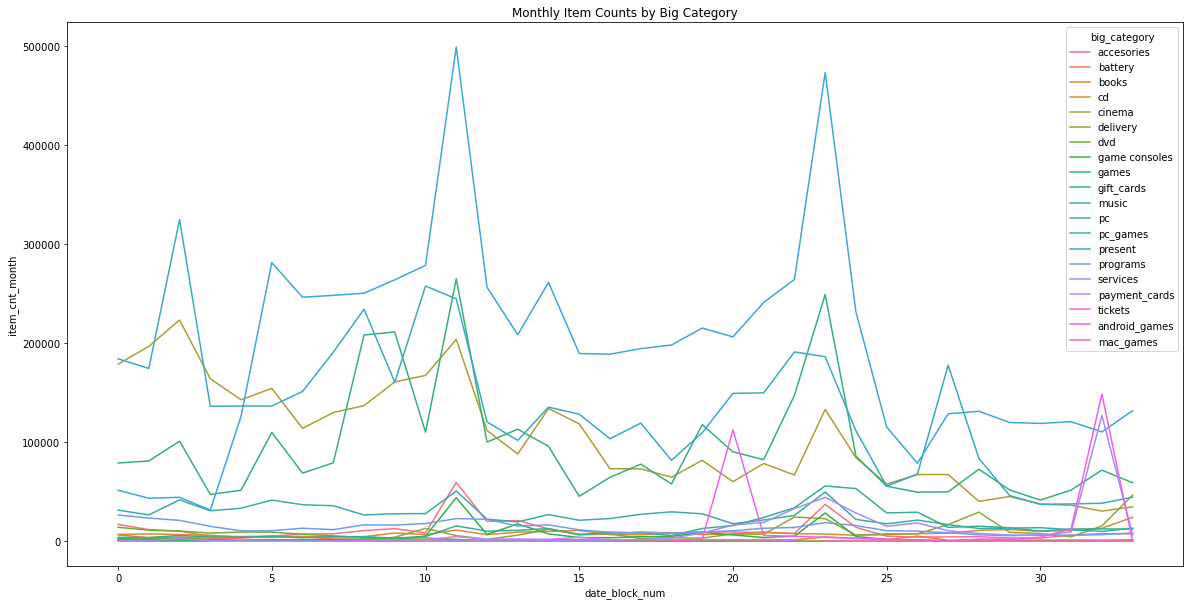

In [120]:
plt_df = full_train.groupby(["date_block_num", "big_category"], as_index=False).sum()

plt.figure(figsize=(20, 10))
sns.lineplot(
    x="date_block_num", y="item_cnt_month", data=plt_df, hue="big_category"
)
plt.title("Monthly Item Counts by Big Category")

Text(0.5, 1.0, 'Monthly Item Counts by City')

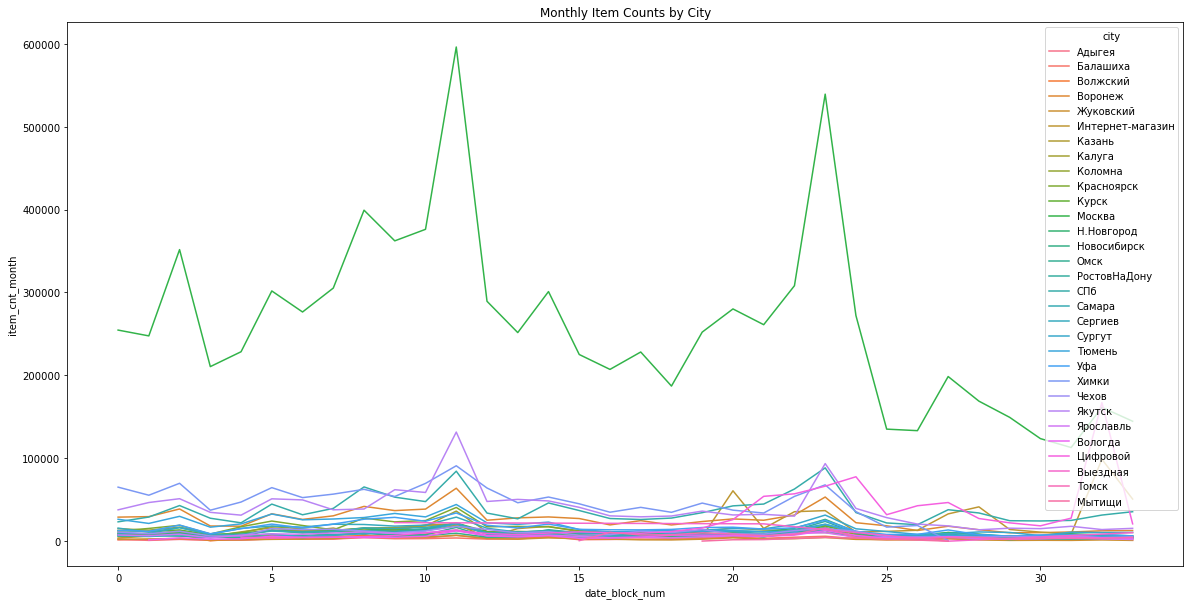

In [146]:
plt_df = full_train.groupby(["date_block_num", "city"], as_index=False).sum()

plt.figure(figsize=(20, 10))
sns.lineplot(
    x="date_block_num", y="item_cnt_month", data=plt_df, hue="city"
)
plt.title("Monthly Item Counts by City")

## test

In [147]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# Feature Engineering

# Validation

# Submission